In [1]:
from os import listdir
from os.path import isfile, join
path = 'C:/Users/mlybo/OneDrive/Documents/si_twitter_project/si_twitter_thumbnails'
imgs = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
from PIL import Image
img_embeddings = []

for img_string in imgs:
    image = Image.open(join(path, img_string))
    embedding = img_model.encode(image)
    img_embeddings.append(embedding)

c:\users\mlybo\my_env\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
from annoy import AnnoyIndex

l = len(img_embeddings[1])

t = AnnoyIndex(l, 'angular')

#index the image embedding vectors

for i in range(len(img_embeddings)):
    t.add_item(i, img_embeddings[i])

#create search tool 

t.build(10)

True

0.00058263837127015


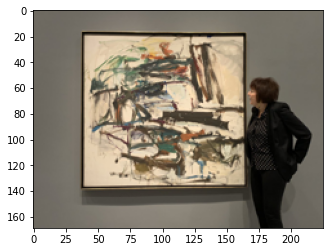

A figure stands in front of a painting.
0.5168713927268982


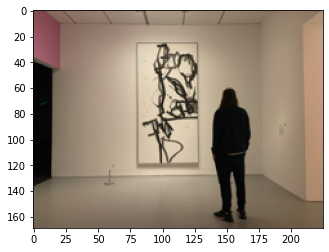

A figure stands in front of a large abstract painting
0.6018275618553162


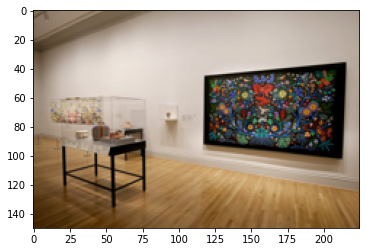

Installation view of Hearts of Our People exhibition at the Renwick Gallery.
0.6018275618553162


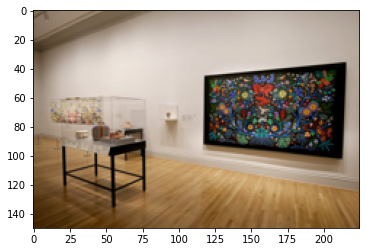

Installation view of Hearts of Our People exhibition at the Renwick Gallery.
0.6080255508422852


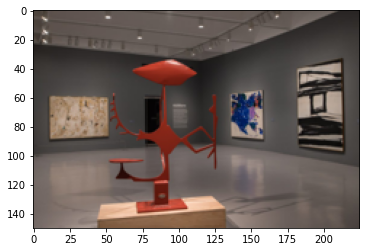

A gallery with three abstract paintings in the background, and one red metal sculpture in the foreground.
0.6099614500999451


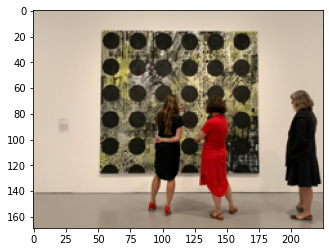

Three figures stand in front of a large abstract painting in a gallery.
0.6169002056121826


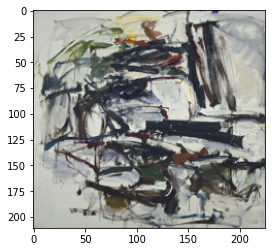

An abstract painting
0.6319368481636047


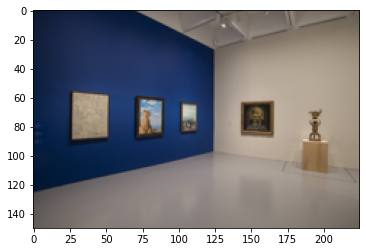

View of a gallery with one white wall and one blue wall, with a selection of paintings hanging and one sculpture. 
0.6321479678153992


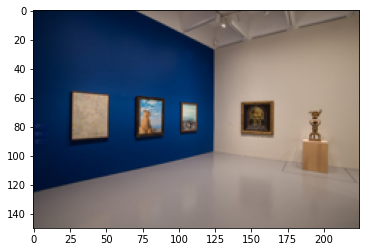

A gallery with paintings on the wall and a sculpture on a pedestal.
0.6777839660644531


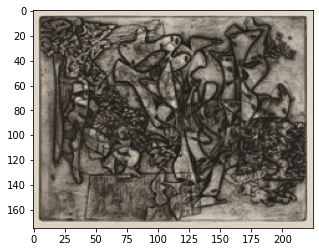

Abstract print in greys.


In [19]:
from sklearn.preprocessing import normalize
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


#create text model

text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')

#search sample vector

search_image = Image.open(join(path, '3_1197655388327268352.png'))
my_embed = img_model.encode([search_image])
#search_string = "picture of a woman in front of a building"
#my_embed = text_model.encode([search_string])
my_embed = normalize(my_embed, norm='l2')
img_nums = t.get_nns_by_vector(my_embed[0], 10, include_distances=True)

for num in range(len(img_nums[0])):
    img_string = imgs[img_nums[0][num]]
    print(img_nums[1][num])
    testim = mpimg.imread(join(path, img_string))
    plt.imshow(testim)
    plt.show()
    
    media_id = img_string.replace('.png', '')
    
    alt_text = tweets_frame.loc[tweets_frame['media_id'] == media_id]['alt_text'].item()
    print(alt_text)

#what do I want to do: print the extant captions

In [12]:
t.save('tweets.ann')

True

In [13]:
import pandas as pd
tweets_frame = pd.read_csv('tweets_alt_text.csv')

In [18]:
print(tweets_frame['alt_text'][10])
tweets_frame['media_id'][10]
tweets_frame.loc[tweets_frame['media_id'] == '3_1505565196160544774']['alt_text'].item()

Screenshot from an artwork in an app that displays falling cherry blossoms in front of the US Capitol.


'Screenshot from an artwork in an app that displays falling cherry blossoms in front of the US Capitol.'

In [31]:
search_string = tweets_frame['alt_text'][10]
my_embed = text_model.encode([search_string])
my_embed = normalize(my_embed, norm='l2')
img_nums = t.get_nns_by_vector(my_embed[0], 10, include_distances=True)

for num in range(len(img_nums[0])):
    img_string = imgs[0][num]
    print(img_string)
    print(imgs[1][num])
    testim = mpimg.imread(join(path, img_string))
    plt.imshow(testim)
    plt.show()

3
3


Downloading:   8%|████▊                                                       | 42.8M/539M [18:29:24<214:10:24, 643B/s]


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/mlybo/OneDrive/Documents/si_twitter_project/si_twitter_thumbnails\\3'